<a href="https://colab.research.google.com/github/FaizanHameed1/Document-Classification-using-Transformers/blob/main/Pathema_Document_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
%cd '/content/drive/My Drive/Kaggle/pathema/'

/content/drive/My Drive/Kaggle/pathema


In [ ]:
#!mkdir pathema

In [ ]:
#% cd pathema/

In [ ]:
path='/content/drive/My Drive/Kaggle/pathema/'

In [ ]:
#!pip install albumentations #for data augmentation

In [ ]:
import os
#checking that how many files are there in each folder/class
print("-----Number of images in each folder-----")
print("Admin Note:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Admin Note")))
print("Clinical History And Summary:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Clinical History And Summary")))
print("Consult Note:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Consult Note")))
print("Cover Page:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Cover Page")))
print("Lab Test:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Lab Test")))
print("Other:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Other")))
print("Patient Profile:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Patient Profile")))
print("Requisition Form:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Requisition Form")))


-----Number of images in each folder-----
Admin Note: 23
Clinical History And Summary: 34
Consult Note: 48
Cover Page: 10
Lab Test: 4
Other: 7
Patient Profile 5
Requisition Form 11


In [ ]:
#code for checking the length of different classes
#class_len={}
#for folder in os.listdir(path_t):
#  clas_len[str(folder)]=len(folder)
#
#print(class_len)

{'Clinical History And Summary': 28, 'Lab Test': 8, 'Requisition Form': 16, 'Other': 5, 'Admin Note': 10, 'Patient Profile': 15, 'Consult Note': 12, 'Cover Page': 10, 'augmented': 9}


[]

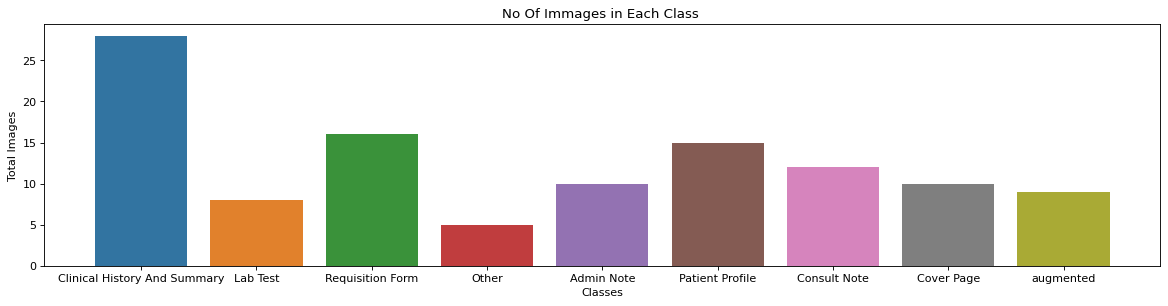

In [ ]:
class_length={}
for folder in os.listdir("/content/drive/MyDrive/Kaggle/pathema/"):
  class_length[folder]=len(folder)
print(class_length)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

keys=list(class_length.keys())
val= list(class_length.values())
plt.figure(figsize=(18, 4), dpi=80)
sns.barplot(x=keys, y=val)
plt.xlabel("Classes")
plt.ylabel("Total Images")
plt.title("No Of Immages in Each Class ")
plt.plot()

In [ ]:
!pip install pillow

In [ ]:
#making a folder to save the augmented images
#!mkdir /content/drive/MyDrive/Kaggle/pathema/augmented/

mkdir: cannot create directory ‘/content/drive/MyDrive/Kaggle/pathema/augmented/’: File exists


In [ ]:
#data augmentation
import albumentations as A
import cv2

#def visualize(image):
#    plt.figure(figsize=(10, 10))
#    plt.axis('off')
#    plt.imshow(image)


#we will augment our image according to the number of images in each folder so we will chane "X" and "Y" linre of code
im_aug_path="/content/drive/MyDrive/Kaggle/pathema/Admin Note/"#change the directory last folder to change the folder of which data you want to augment
t_aug=1   #total number of augmented images that we will get after implementation of augmentation
#out_file=
#!mkdir()
out_dir="/content/drive/MyDrive/Kaggle/pathema/augmented/"

transform = A.Compose(
    [A.CLAHE(),
     A.RandomCrop(width=1400,height=1600),

     A.Blur(blur_limit=3),
     A.OpticalDistortion(),
     A.GridDistortion(),
     A.HueSaturationValue()])
i=0
for im in os.listdir(im_aug_path):#==>X
  for num in range(t_aug): #==>Y
    image = cv2.imread(im_aug_path + im)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    augmented_image = transform(image=image)['image']
    #print(augmented_image)
    #cv2.imwrite("x.png", augmented_image)
    #print("----")

    cv2.imwrite(os.path.join(out_dir,(str(i)+'img.png')), augmented_image)
    i+=1
len(os.listdir(out_dir))
    #visualize(augmented_image)

23

In [ ]:
#moving the files from "augmented" folder to their orignal folder(i.e in case of data augmentation of lab test we will move it to "Lab test" foldder)
#our source folder is "out_dir" while destination folder will be the folder which files are used in data augmentation
import shutil
source=os.listdir(out_dir)
destin=im_aug_path

for files in source:
  file_p=out_dir+ files
  shutil.move(file_p,destin)
len(os.listdir(destin))#cheking the number of file in output folder

46

In [ ]:
import os
#checking that how many files are there in each folder/class
print("-----Number of images in each folder-----")
print("Admin Note:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Admin Note")))
print("Clinical History And Summary:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Clinical History And Summary")))
print("Consult Note:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Consult Note")))
print("Cover Page:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Cover Page")))
print("Lab Test:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Lab Test")))
print("Other:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Other")))
print("Patient Profile:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Patient Profile")))
print("Requisition Form:",len(os.listdir("/content/drive/MyDrive/Kaggle/pathema/Requisition Form")))

-----Number of images in each folder-----
Admin Note: 46
Clinical History And Summary: 48
Consult Note: 48
Cover Page: 48
Lab Test: 48
Other: 48
Patient Profile: 48
Requisition Form: 48


In [ ]:
#getting images path and labels
labels=[]
images=[]
#images_labels=[]
#imges_labels={}
for folder in os.listdir():
  folder_path=path + folder
  for img in os.listdir(folder_path):
    img_path=folder_path + '/'+ img
    labels.append(folder)
    images.append(img_path)
    #images_labels.append([img_path,folder])
    #mges_labels[img_path]=folder
#print(imges_labels)


In [ ]:
import pandas as pd
#making dataframe from labels and images path lists
dframe= pd.DataFrame()
dframe["image_path"]=images
dframe["label"]=labels
dframe.head(10)

,image_path,label
0,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
1,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
2,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
3,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
4,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
5,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
6,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
7,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
8,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary
9,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary


In [ ]:
import pandas as pd
#converting list into dataframe
##dframe = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
##dframe.head()


#data=pd.DataFrame(imges_labels,columns=['image_path','labels'])
#print(data.head(10))

In [ ]:
type(dframe)

pandas.core.frame.DataFrame

In [ ]:
dframe.info

<bound method DataFrame.info of                                             image_path                         label
0    /content/drive/My Drive/Kaggle/pathema/Clinica...  Clinical History And Summary
1    /content/drive/My Drive/Kaggle/pathema/Clinica...  Clinical History And Summary
2    /content/drive/My Drive/Kaggle/pathema/Clinica...  Clinical History And Summary
3    /content/drive/My Drive/Kaggle/pathema/Clinica...  Clinical History And Summary
4    /content/drive/My Drive/Kaggle/pathema/Clinica...  Clinical History And Summary
..                                                 ...                           ...
377  /content/drive/My Drive/Kaggle/pathema/Other/4...                         Other
378  /content/drive/My Drive/Kaggle/pathema/Other/3...                         Other
379  /content/drive/My Drive/Kaggle/pathema/Other/4...                         Other
380  /content/drive/My Drive/Kaggle/pathema/Other/3...                         Other
381  /content/drive/My Drive/Kagg

In [ ]:
len(dframe)

382

In [ ]:
#splitting the training and test sets
from sklearn.model_selection import train_test_split

feat=dframe[["image_path"]]#features
lab=dframe[["label"]]#labels

x_train, x_val_tst, y_train, y_val_tst = train_test_split(feat, lab, test_size=0.3,random_state=42,stratify=lab)
x_valid,x_test,y_valid,y_test=train_test_split(x_val_tst, y_val_tst, test_size=0.5,random_state=42,stratify=y_val_tst)

print(f"total training Examples: {len(x_train)}")
print(f"total validation Examples: {len(x_valid)}")
print(f"total test Examples: {len(x_test)}")

total training Examples: 267
total validation Examples: 57
total test Examples: 58


In [ ]:
import pandas as pd

#train dataframe     pd.concat([df1, df4], axis=1)
df_train= pd.concat([x_train, y_train], axis=1)
#validation dataframe
df_val= pd.concat([x_valid, y_valid], axis=1)
#test dataframe
df_test= pd.concat([x_test, y_test], axis=1)

print(f"length of training dataframe: {len(df_train)}")
print(f"length of validation dataframe: {len(df_val)}")
print(f"length of test dataframe: {len(df_test)}")


length of training dataframe: 267
length of validation dataframe: 57
length of test dataframe: 58


In [ ]:
df_train.head()

,image_path,label
54,/content/drive/My Drive/Kaggle/pathema/Requisi...,Requisition Form
58,/content/drive/My Drive/Kaggle/pathema/Requisi...,Requisition Form
197,/content/drive/My Drive/Kaggle/pathema/Patient...,Patient Profile
218,/content/drive/My Drive/Kaggle/pathema/Patient...,Patient Profile
8,/content/drive/My Drive/Kaggle/pathema/Clinica...,Clinical History And Summary


In [ ]:
#first image
#print(df.iloc[0:1,0])

In [ ]:
images[4]

'/content/drive/My Drive/Kaggle/pathema/Clinical History And Summary/Sample 1-4.png'

In [ ]:
#printing an image
from google.colab.patches import cv2_imshow
import cv2 as cv
#import matplotlib.pyplot as plt
#%matplotlib inline
img=cv.imread(images[4])
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv2_imshow(grayscale)#can't show image due to copy rights


#cv.imshow(img)

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(images[4])
image = image.convert("RGB")
#to show the image
#image

In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
#to get the words and bounding boxes 
import pytesseract
import numpy as np
ocr_dframe = pytesseract.image_to_data(image, output_type='data.frame')
ocr_dframe


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1695,2193,-1,NaN
1,2,1,1,0,0,0,99,170,45,62,-1,NaN
2,3,1,1,1,0,0,99,170,45,62,-1,NaN
3,4,1,1,1,1,0,101,170,43,19,-1,NaN
4,5,1,1,1,1,1,101,170,43,19,33,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...
574,5,1,30,1,1,3,1416,2102,7,16,59,;
575,5,1,30,1,1,4,1432,2097,142,22,89,1103-819148
576,4,1,30,1,2,0,1479,2146,95,21,-1,NaN
577,5,1,30,1,2,1,1479,2147,43,20,69,Pega


In [ ]:
len(ocr_dframe)

579

In [ ]:
ocr_dframe = ocr_dframe.dropna().reset_index(drop=True)#dropping the rows where atleast one element is not present(i.e "text" is not present)
ocr_dframe

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,101,170,43,19,33,Coat
1,5,1,1,1,2,1,99,194,45,15,51,055.2
2,5,1,1,1,3,1,100,215,44,17,35,C53
3,5,1,2,1,1,1,100,260,52,18,55,Cot
4,5,1,2,1,2,1,100,284,55,16,55,57.02
...,...,...,...,...,...,...,...,...,...,...,...,...
394,5,1,30,1,1,2,1387,2097,23,21,92,ID
395,5,1,30,1,1,3,1416,2102,7,16,59,;
396,5,1,30,1,1,4,1432,2097,142,22,89,1103-819148
397,5,1,30,1,2,1,1479,2147,43,20,69,Pega


In [ ]:
len(ocr_dframe)

399

In [ ]:
ocr_dframe.columns

Index(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf', 'text'],
      dtype='object')

In [ ]:
len(ocr_dframe.columns)

12

In [ ]:
float_cols = ocr_dframe.select_dtypes('float').columns #return a subset of the DataFrame's columns based on the column dtypes.
ocr_dframe[float_cols] = ocr_dframe[float_cols].round(0).astype(int) #selecting float_cols,round along zero,changing type to integer
ocr_dframe[float_cols] 

""
0
1
2
3
4
...
394
395
396
397


In [ ]:
ocr_dframe = ocr_dframe.replace(r'^\s*$', np.nan, regex=True)# replace field that's entirely space (or empty) with NaN check https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
ocr_dframe

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,101,170,43,19,33,Coat
1,5,1,1,1,2,1,99,194,45,15,51,055.2
2,5,1,1,1,3,1,100,215,44,17,35,C53
3,5,1,2,1,1,1,100,260,52,18,55,Cot
4,5,1,2,1,2,1,100,284,55,16,55,57.02
...,...,...,...,...,...,...,...,...,...,...,...,...
394,5,1,30,1,1,2,1387,2097,23,21,92,ID
395,5,1,30,1,1,3,1416,2102,7,16,59,;
396,5,1,30,1,1,4,1432,2097,142,22,89,1103-819148
397,5,1,30,1,2,1,1479,2147,43,20,69,Pega


In [ ]:
ocr_dframe.text

0             Coat
1            055.2
2              C53
3              Cot
4            57.02
          ...     
394             ID
395              ;
396    1103-819148
397           Pega
398           4aid
Name: text, Length: 399, dtype: object

In [ ]:
#making a list of words in the image
image_words=[]
for word in list(ocr_dframe.text):
  if str(word)!="nan":
    image_words.append(str(word))

#print(image_words[0:10])#not printing data due to copy rights
print("-----")

#joining words with space
words= " ".join(image_words)
words



-----


'Coat 055.2 C53 Cot 57.02 288.49 283.43 45.4 ‘AB.0Z C488 54.0 ost CH2 844 C548 078.00 78,01 678.02 CHA CAS C426 cbs CTALS2 C229 022.8 022.8 o22.4 1/25/2020 12:25 PM FROM: Fax John M Clark MD TO: 18139837876 QUARIAN CANCER Malignant nepplasm of tight ovary Malignant neoplaem of laf ovary Mafgnant neoplasm of unspecttied ovary Mafignont neoplasm of unspocifiod fallopian tubo Malignant ncoplasm of tight falfopian tube Mefignant nepptagmn of taf fatopien tutes Femily history of malignant neoplasm of ovetry Porsanal history of malignant neoplasm of ovary Mosathatioms of poritonaum Malignant neoplasin of sposiied paris of petitensim Mafignant ncoptasm of peritoneum, unspectiisd esignant neapleem of overopping otas of rettoporitoncum ond pertoneum Mofignent neopiesm of istherus uted Matignant neoptasm of endamatium Mafgnant necptsam of myomatrium Mafignant neoplasm of fundus wor Malignant neoplasm of overtapping sites of corpus utet Setondaty melgnant necpisam of mnapocified kidnoy and tana) 

In [ ]:
#extracting the bounding boxes from ocr_dframe(getting sub dataframe)
coordinates = ocr_dframe[['left', 'top', 'width', 'height']]
coordinates

,left,top,width,height
0,101,170,43,19
1,99,194,45,15
2,100,215,44,17
3,100,260,52,18
4,100,284,55,16
...,...,...,...,...
394,1387,2097,23,21
395,1416,2102,7,16
396,1432,2097,142,22
397,1479,2147,43,20


In [ ]:
#making the list of actual boxes
actual_boxes = []


for idx,row in coordinates.iterrows():
  x, y, w, h = row # format of row is (left, top, width, height)
  actual_box = [x, y, x+w, y+h] #to get actual box we did it by (left, top, left+width, top+height)
  actual_boxes.append(actual_box)

actual_boxes[0:10]

[[101, 170, 144, 189],
 [99, 194, 144, 209],
 [100, 215, 144, 232],
 [100, 260, 152, 278],
 [100, 284, 155, 300],
 [100, 306, 152, 322],
 [100, 330, 153, 347],
 [100, 391, 143, 407],
 [99, 437, 154, 453],
 [100, 459, 145, 476]]

In [ ]:
#drawing bounding boxes ovrer the words of image
from PIL import ImageDraw,ImageFont

draw_img = ImageDraw.Draw(image, "RGB")

for box in actual_boxes:
  draw_img.rectangle(box, outline='blue')

#image#we did not show image due to copy rights 

In [ ]:
#normalizing the boxes,requirement of layoutLM model
def normalize_bbox(bbox, width, height):
     return [
         int(1000 * (bbox[0] / width)),
         int(1000 * (bbox[1] / height)),
         int(1000 * (bbox[2] / width)),
         int(1000 * (bbox[3] / height)),
     ]


In [ ]:
#making the list of normalized bounding boxes of the image
width, height = image.size##we got the width and height from the size of the image

normalized_bboxes = []
for bbox in actual_boxes:
  normalized_bboxes.append(normalize_bbox(bbox, width, height))
print(normalized_bboxes)       
# add as extra columns 
#assert len(words) == len(normalized_bboxes)#number of words in an immage should be equal to the number of boxes otherwise it will give the asserton error

#example['words'] = words
#example['bbox'] = normalized_bboxes

[[59, 77, 84, 86], [58, 88, 84, 95], [58, 98, 84, 105], [58, 118, 89, 126], [58, 129, 91, 136], [58, 139, 89, 146], [58, 150, 90, 158], [58, 178, 84, 185], [58, 199, 90, 206], [58, 209, 85, 217], [58, 219, 84, 227], [58, 230, 84, 237], [58, 240, 85, 247], [58, 250, 84, 257], [58, 260, 84, 268], [58, 288, 91, 295], [58, 298, 90, 306], [58, 309, 91, 316], [58, 358, 85, 365], [58, 368, 85, 376], [58, 378, 85, 386], [58, 406, 85, 413], [58, 416, 97, 424], [58, 445, 85, 452], [58, 455, 85, 462], [58, 466, 85, 473], [58, 476, 85, 483], [214, 15, 275, 23], [283, 15, 316, 22], [325, 15, 338, 22], [353, 15, 384, 22], [394, 15, 414, 22], [422, 15, 448, 22], [456, 15, 463, 22], [470, 15, 505, 22], [512, 15, 526, 22], [539, 15, 558, 22], [568, 15, 643, 22], [146, 67, 231, 77], [0, 0, 1000, 1000], [134, 77, 178, 87], [179, 77, 222, 86], [224, 77, 234, 85], [235, 77, 255, 86], [257, 78, 282, 87], [134, 88, 178, 97], [178, 88, 222, 96], [224, 88, 233, 95], [235, 88, 249, 95], [252, 89, 276, 97], [134

In [ ]:
len(words)

2757

In [ ]:
! pip install transformers datasets

     |████████████████████████████████| 3.4 MB 11.9 MB/s 
     |████████████████████████████████| 306 kB 38.5 MB/s 
     |████████████████████████████████| 596 kB 46.3 MB/s 
     |████████████████████████████████| 895 kB 46.2 MB/s 
     |████████████████████████████████| 61 kB 447 kB/s 
     |████████████████████████████████| 3.3 MB 46.8 MB/s 
     |████████████████████████████████| 243 kB 43.6 MB/s 
     |████████████████████████████████| 132 kB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 42.6 MB/s 
     |████████████████████████████████| 271 kB 47.2 MB/s 
     |████████████████████████████████| 160 kB 54.5 MB/s 
     |████████████████████████████████| 192 kB 53.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#label encoding
#extracting labels from folder name and apending those names in list
dataset_path='/content/drive/MyDrive/Kaggle/pathema'
labels=[]
for folder in os.listdir(dataset_path):
  labels.append(folder)#making the list of folder names which are labels


#encoding the labels from the list
label_index={}
for index,label in enumerate(labels):
  label_index[label]=index

label_index#label to index


{'Admin Note': 6,
 'Clinical History And Summary': 0,
 'Consult Note': 3,
 'Cover Page': 2,
 'Lab Test': 5,
 'Other': 7,
 'Patient Profile': 4,
 'Requisition Form': 1}

In [ ]:
#applying OCR to get the words and bounding boxes of every image
from datasets import Dataset#for preparring input of transformers
#normalizing the boxes,requirement of layoutLM model for more info https://huggingface.co/transformers/v4.4.2/model_doc/layoutlm.html
def normalize_bbox(bbox, width, height):
     return [
         int(1000 * (bbox[0] / width)),
         int(1000 * (bbox[1] / height)),
         int(1000 * (bbox[2] / width)),
         int(1000 * (bbox[3] / height)),
     ]


#repeating the whole procedure that we done before for every image 
def apply_ocr(sample):


        # get the image
        image = Image.open(sample['image_path'])

        
        # apply ocr to the image
        #Extracting words and bounding boxes from images
        ocr_dframe = pytesseract.image_to_data(image, output_type='data.frame')
        #return a subset of the DataFrame's columns based on the column dtypes.
        float_cols = ocr_dframe.select_dtypes('float').columns
        #dropping the rows where atleast one element is not present(i.e "text" is not present)
        ocr_dframe = ocr_dframe.dropna().reset_index(drop=True)
        #selecting float_cols,round along zero,changing type to integer
        ocr_dframe[float_cols] = ocr_dframe[float_cols].round(0).astype(int)
        #replace field that's entirely space (or empty) with NaN check https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
        ocr_dframe = ocr_dframe.replace(r'^\s*$', np.nan, regex=True)
        #dropping the rows where atleast one element is not present(i.e "text" is not present)
        ocr_dframe = ocr_dframe.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_dframe.text if str(word) != 'nan'])
        words = list(ocr_dframe.text)#making the list of column "text" in 'ocr_dframe' dataframe
        words = [str(w) for w in words] #converting into list of string of words from the last words list 
        coordinates = ocr_dframe[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
            actual_boxes.append(actual_box)
      
        # normalize the bounding boxes
        normalized_bboxes = []
        width, height = image.size #getting width and height for normalizing the dataset
        for bbox in actual_boxes:
            normalized_bboxes.append(normalize_bbox(bbox, width, height))
        
        # add as extra columns 
        assert len(words) == len(normalized_bboxes)#number of words in an immage should be equal to the number of boxes otherwise 
        #it will give the asserton error(to avoid further problems in the code or in adding dictionary i.e "sample")
        sample['words'] = words
        sample['bbox'] = normalized_bboxes
        return sample
            



In [ ]:
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

train_dataset

Dataset({
    features: ['image_path', 'label', '__index_level_0__'],
    num_rows: 267
})

In [ ]:
#to explore dataset check info at https://huggingface.co/docs/datasets/exploring.html
print(train_dataset.shape)

print(train_dataset.num_columns)
print(train_dataset.num_rows)

print(len(train_dataset))
print(train_dataset[0])

print(train_dataset.column_names)
print(train_dataset.features)

(267, 3)
3
267
267
{'image_path': '/content/drive/My Drive/Kaggle/pathema/Requisition Form/Sample 1-1.png', 'label': 'Requisition Form', '__index_level_0__': 54}
['image_path', 'label', '__index_level_0__']
{'image_path': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None), '__index_level_0__': Value(dtype='int64', id=None)}


In [ ]:
updated_train_dataset = train_dataset.map(apply_ocr)
updated_val_dataset = val_dataset.map(apply_ocr)
updated_test_dataset = test_dataset.map(apply_ocr)

  0%|          | 0/267 [00:00<?, ?ex/s]

  0%|          | 0/57 [00:00<?, ?ex/s]

  0%|          | 0/58 [00:00<?, ?ex/s]

In [ ]:
#in function "apply_ocr" we added two extra columns i.e "words" and "bounding boxes" 
updated_train_dataset

Dataset({
    features: ['image_path', 'label', '__index_level_0__', 'words', 'bbox'],
    num_rows: 267
})

In [ ]:
#to explore dataset check info at https://huggingface.co/docs/datasets/exploring.html
print(updated_train_dataset.shape)

print(updated_train_dataset.num_columns)
print(updated_train_dataset.num_rows)

print(len(updated_train_dataset))
print(updated_train_dataset[0])

print(updated_train_dataset.column_names)
print(updated_train_dataset.features)

(267, 5)
5
267
267
{'image_path': '/content/drive/My Drive/Kaggle/pathema/Requisition Form/Sample 1-1.png', 'label': 'Requisition Form', '__index_level_0__': 54, 'words': ['1/25/2020', '12:25', 'PM', 'FROM:', '8139837876', 'PAGE:', '007', 'OF', '010', 'Regina', 'K', 'Wright', '9d', '(0.274', 'ai', 'DOB:', '1951-12-10', 'mellilae', 'Or', 'Sc', 'PathemaGx"', 'HIATT', 'TON', 'UU', 'A', 'Peco', 'tear', ',', 'a', 'GX', '#4', '819140', 'weiss', '(1)', 'PATIENT', 'INFORMATION', 'pai', 'ey', 'ee', '(2)', 'INSURANCE', 'INFORMATION', 'Insurance', 'Company', 'Name', 'Pind', 'Polley', '#', 'AARP', 'Medicare', 'Advantage', 'Choice', 'Plan', '1', 'H8211', '5C43HDOPQ7S', 'Patlont', 'Relation', 'to', 'Policy', 'Holder', '|Name', 'and', 'DOB', 'of', 'Policy', 'Holder', '(if', 'not', 'Self}', '{3}', 'PATIENT', 'ACKNOWLEDGEMENT', '&', 'CONSENT', '|', 'confirm', 'that', '|', 'have', 'been', 'informed', 'about', 'the', 'datails', 'of', 'Hereditary', 'Cancer', 'Risk', 'Assessment', 'Gene', 'Tests', 'ordered

In [ ]:
#we can see that there is an extra column here known as '__index_level_0__'. We will remove this column to avoid
#error (KeyError: 'Column __index_level_0__ does not exist in schema') when we run our cell (encoded_train_dataset,encoded_val_dataset and encoded_test_dataset)
#in future
updated_train_dataset=updated_train_dataset.remove_columns("__index_level_0__")
updated_val_dataset=updated_val_dataset.remove_columns("__index_level_0__")
updated_test_dataset=updated_test_dataset.remove_columns("__index_level_0__")


In [ ]:
#with the help of layoutLm tokenizer we can get attention_mask, input_ids, token_type_ids and bbox from  given "words" and "bbox" 
import torch
from transformers import LayoutLMTokenizer
tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/170 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/606 [00:00<?, ?B/s]

In [ ]:
def encode_sample(sample, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = sample['words']
  normalized_word_boxes = sample['bbox']

  assert len(words) == len(normalized_word_boxes)

  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))######### every word token is part of the same box so, we give same box to every token
  
  # Truncation of token_boxes
  special_tokens_count = 2 
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]#to make place available for cls and sep tokens(token embedding see BERT paper)
  
  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]#(Token Embedding)A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
  #we are making a single token sequence of every image(so we are using all words of an immage)
  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)#### is it maximum length of words in an immage "having maximum words"
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]#we got input_ids without padding because in next line of code we want to get padding length using input_id
  #for more info on tokenisation visit https://huggingface.co/docs/transformers/glossary#input-ids
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length #token_boxes = token_boxes + [pad_token_box] * padding_length #updating/padding the token boxes to "[0, 0, 0, 0] times padding_length" to make it equal to maximum sequence length
  encoding['bbox'] = token_boxes #adding paddded token boxes (in last line of code) in encoding with name "bbox"
  encoding['label'] = label_index[sample['label']] # gives us a number /index of the label from the dictionary label2idx

  assert len(encoding['input_ids']) == max_seq_length
  assert len(encoding['attention_mask']) == max_seq_length
  assert len(encoding['token_type_ids']) == max_seq_length
  assert len(encoding['bbox']) == max_seq_length

  return encoding

In [ ]:
labels

['Clinical History And Summary',
 'Requisition Form',
 'Cover Page',
 'Consult Note',
 'Patient Profile',
 'Lab Test',
 'Admin Note',
 'Other']

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D

# we need to define the features ourselves as the bbox of LayoutLM are an extra feature
features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(num_classes=8, names=['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note', 'Cover Page']),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})####names=['refuted', 'entailed']????


In [ ]:
updated_train_dataset

Dataset({
    features: ['image_path', 'label', 'words', 'bbox'],
    num_rows: 267
})

In [ ]:
encoded_train_dataset = updated_train_dataset.map(lambda sample: encode_sample(sample), 
                                      features=features)###???"lambda sample: encode_sample(sample)" is a function to which map passes each element of given iterabl(features).features is a iterable which is to be mapped?????
encoded_val_dataset = updated_val_dataset.map(lambda sample: encode_sample(sample), 
                                      features=features)
encoded_test_dataset = updated_test_dataset.map(lambda sample: encode_sample(sample), 
                                      features=features)

  0%|          | 0/267 [00:00<?, ?ex/s]

  0%|          | 0/57 [00:00<?, ?ex/s]

  0%|          | 0/58 [00:00<?, ?ex/s]

In [ ]:
encoded_train_dataset

Dataset({
    features: ['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label', 'image_path', 'words'],
    num_rows: 267
})

In [ ]:
#to explore dataset check info at https://huggingface.co/docs/datasets/exploring.html
print(encoded_train_dataset.shape)

print(encoded_train_dataset.num_columns)
print(encoded_train_dataset.num_rows)

print(len(encoded_train_dataset))
print(encoded_train_dataset[0])

print(encoded_train_dataset.column_names)
print(encoded_train_dataset.features)

(267, 7)
7
267
267
{'input_ids': [101, 1015, 1013, 2423, 1013, 12609, 2260, 1024, 2423, 7610, 2013, 1024, 6282, 23499, 2620, 24434, 2620, 2581, 2575, 3931, 1024, 4002, 2581, 1997, 5890, 2692, 12512, 1047, 6119, 1023, 2094, 1006, 1014, 1012, 25586, 9932, 2079, 2497, 1024, 4131, 1011, 2260, 1011, 2184, 11463, 3669, 2721, 2063, 2030, 8040, 4130, 14545, 2290, 2595, 1000, 7632, 19321, 10228, 1057, 2226, 1037, 21877, 3597, 7697, 1010, 1037, 1043, 2595, 1001, 1018, 6282, 2683, 16932, 2692, 17889, 1006, 1015, 1007, 5776, 2592, 6643, 2072, 1041, 2100, 25212, 1006, 1016, 1007, 5427, 2592, 5427, 2194, 2171, 9231, 2094, 8554, 3240, 1001, 9779, 14536, 27615, 5056, 3601, 2933, 1015, 1044, 2620, 17465, 2487, 1019, 2278, 23777, 14945, 7361, 4160, 2581, 2015, 6986, 7811, 2102, 7189, 2000, 3343, 9111, 1064, 2171, 1998, 2079, 2497, 1997, 3343, 9111, 1006, 2065, 2025, 2969, 1065, 1063, 1017, 1065, 5776, 13399, 3672, 1004, 9619, 1064, 12210, 2008, 1064, 2031, 2042, 6727, 2055, 1996, 2951, 12146, 1997, 1480

In [ ]:
#layoutLm implimentation(in transformers) is in Pytorch. So, we are going  to convert every thing in Pytorch format
encoded_train_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])
encoded_val_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])
encoded_test_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

In [ ]:
encoded_train_dataset

Dataset({
    features: ['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label', 'image_path', 'words'],
    num_rows: 267
})

In [ ]:
#to explore dataset check info at https://huggingface.co/docs/datasets/exploring.html
print(encoded_train_dataset.shape)

print(encoded_train_dataset.num_columns)
print(encoded_train_dataset.num_rows)

print(len(encoded_train_dataset))
print(encoded_train_dataset[0])

print(encoded_train_dataset.column_names)
print(encoded_train_dataset.features)

(267, 7)
7
267
267
{'input_ids': tensor([  101,  1015,  1013,  2423,  1013, 12609,  2260,  1024,  2423,  7610,
         2013,  1024,  6282, 23499,  2620, 24434,  2620,  2581,  2575,  3931,
         1024,  4002,  2581,  1997,  5890,  2692, 12512,  1047,  6119,  1023,
         2094,  1006,  1014,  1012, 25586,  9932,  2079,  2497,  1024,  4131,
         1011,  2260,  1011,  2184, 11463,  3669,  2721,  2063,  2030,  8040,
         4130, 14545,  2290,  2595,  1000,  7632, 19321, 10228,  1057,  2226,
         1037, 21877,  3597,  7697,  1010,  1037,  1043,  2595,  1001,  1018,
         6282,  2683, 16932,  2692, 17889,  1006,  1015,  1007,  5776,  2592,
         6643,  2072,  1041,  2100, 25212,  1006,  1016,  1007,  5427,  2592,
         5427,  2194,  2171,  9231,  2094,  8554,  3240,  1001,  9779, 14536,
        27615,  5056,  3601,  2933,  1015,  1044,  2620, 17465,  2487,  1019,
         2278, 23777, 14945,  7361,  4160,  2581,  2015,  6986,  7811,  2102,
         7189,  2000,  3343,  9

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(encoded_train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(encoded_val_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(encoded_val_dataset, batch_size=1, shuffle=True)




batch = next(iter(train_dataloader))
batch

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
batch["input_ids"][0]

tensor([  101,  8915,  1051,  2050,  9686,  2057,  3389, 25974,  1010,  2310,
        12129,  2015, 29347,  4213, 11510,  2102,  1027,  1041,  5776,  2495,
         5292,  4213,  2213,  2078,  1520,  1055,  1064, 10556, 21572,  5794,
         1024,  3534,  1064, 10848,  2740,  1064, 11333,  3597,  2595, 15035,
         3456,  8715,  1025,  2054,  2017,  2064,  2079,  8030,  1997, 15035,
         4190,  8715,  1006,  1054,  4877,  1007,  2064,  2022,  5845,  1012,
         2362,  1010,  2017,  1998,  2115,  2740, 10802,  2064,  2147,  2006,
         2115,  3949,  2933,  1010,  2065,  2734,  1010, 20992,  2089,  2022,
        16250,  1012, 25520,  4553,  2054,  2017,  2064,  2079,  2000,  7496,
         2115, 17964,  1012,  2204,  3637, 14243,  1998,  1037,  7965,  9580,
         1024,  2393,  2017,  2717,  2488,  2012,  2305,  1998,  2031,  2062,
         2943,  2076,  1996,  2154,  1012,  1064,  2003,  1041,  2080,  1012,
         2551,  2007,  2115,  2740,  2729, 10802,  1054,  4877, 

In [ ]:
#checking input_ids that whether they are correct by decoding them
tokenizer.decode(batch['input_ids'][0].tolist())

"[CLS] te oa es we leeuw, veeens aewaeert = e patient education hawamn ‘ s | kaprotan : pacific | ore health | wacox restless legs syndrome ; what you can do symptoms of restless leg syndrome ( rls ) can be treated. together, you and your health provider can work on your treatment plan, if needed, medications may be prescribed. als learn what you can do to ease your discomfort. good sleep habits and a healthy lifestyle : help you rest better at night and have more energy during the day. | is eo. working with your health care provider rls may occur on its own and may be passed on in families. it is sometimes linked to o medical problems. low iron may cause some rls symptoms. your health care provide : order a lab test fo check your iron level, other medical problems associated with rls a kidney disease, diabetes, and multiple sclerosis, your doctor may prescribe medication reduce your symptoms and help you sleep better. tips for temporary relief | to reduce your discomfort, try the foll

In [ ]:
#batch["label"][0]

In [ ]:
batch["label"][0].item() #it is 7th label(so,check what is 7th label(in next cell))


7

In [ ]:
#label_index[batch['label'][0].item()]#so 4th label is "Admin Note" in our "idx2label" 

In [ ]:
#Defining the Model
#initilizing the model with the weights of pre trained model
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label_index))
model.to(device)

Downloading:   0%|          | 0.00/432M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint 

LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0): LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
      

In [ ]:
#model training
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 30
t_total = len(train_dataloader) * num_train_epochs # total number of training steps 

#put the model in training mode
model.train()
###
train_epoch=[]
train_acc=[]
val_acc=[]
curr_loss=[]
#val_epoch=[]


for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  ###
  train_epoch.append(epoch)
  running_loss = 0.0
  correct = 0
  for batch in train_dataloader:

      input_ids = batch["input_ids"].to(device)
      bbox = batch["bbox"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      token_type_ids = batch["token_type_ids"].to(device)
      labels = batch["label"].to(device)

      # forward pass
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                      labels=labels)
      loss = outputs.loss
  
      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == labels).float().sum()

      # backward pass to get the gradients 
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1
  
  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / len(df_train)
  print("Training accuracy:", accuracy.item())
  ###
  train_acc.append(accuracy.item())
  ###
  curr_loss.append(running_loss / batch["input_ids"].shape[0])

  #checking on validation dataset
  #if epoch%5==0:
  model.eval()

  correct = 0
  for batch in val_dataloader:

    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)


    outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)

    predictions = outputs.logits.argmax(-1)
    correct += (predictions == labels).float().sum()

  accuracy = 100 * correct / len(df_val)
  print("Validation accuracy:", accuracy.item())
    ###
  val_acc.append(accuracy.item())
  #val_epoch.append(epoch)
    
  print("-----------")

Epoch: 0
Loss: 370.3662328980863
Training accuracy: 49.8127326965332
Validation accuracy: 80.70175170898438
-----------
Epoch: 1
Loss: 105.90898480825126
Training accuracy: 88.76404571533203
Validation accuracy: 92.98246002197266
-----------
Epoch: 2
Loss: 164.53667445201427
Training accuracy: 79.77528381347656
Validation accuracy: 52.6315803527832
-----------
Epoch: 3
Loss: 165.62881517224014
Training accuracy: 80.14981079101562
Validation accuracy: 87.71929931640625
-----------
Epoch: 4
Loss: 176.23266162537038
Training accuracy: 80.14981079101562
Validation accuracy: 77.19298553466797
-----------
Epoch: 5
Loss: 27.19980255700648
Training accuracy: 97.7528076171875
Validation accuracy: 94.7368392944336
-----------
Epoch: 6
Loss: 13.336258570663631
Training accuracy: 98.50187683105469
Validation accuracy: 98.24561309814453
-----------
Epoch: 7
Loss: 38.950651173945516
Training accuracy: 95.505615234375
Validation accuracy: 87.71929931640625
-----------
Epoch: 8
Loss: 53.29204900469631

In [ ]:
#creating a dataframe from lists to plot the graphs
df_an = pd.DataFrame(list(zip(train_epoch, train_acc,curr_loss,val_acc)),
               columns =['epoch', 'train_acc','loss','val_acc'])
df_an.head()

,epoch,train_acc,loss,val_acc
0,0,49.812733,370.366233,80.701752
1,1,88.764046,105.908985,92.982460
2,2,79.775284,164.536674,52.631580
3,3,80.149811,165.628815,87.719299
4,4,80.149811,176.232662,77.192986


[]

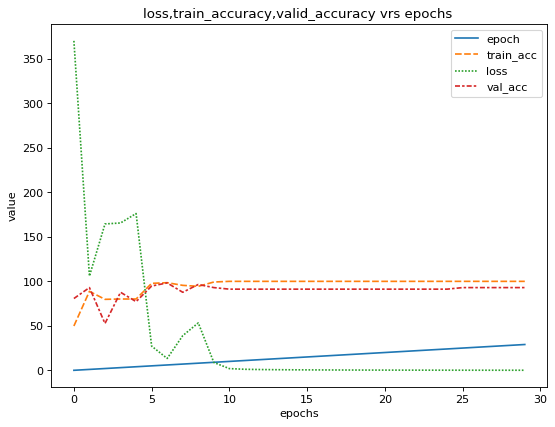

In [ ]:
#plotting training epochs,loss,accuracy and validation accuracy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data = df_an)
plt.xlabel("epochs")
plt.ylabel("value")
plt.title("loss,train_accuracy,valid_accuracy vrs epochs ")
plt.plot()

In [ ]:
#checking the cuda memory
#!nvidia-smi

In [ ]:
#cleaning the CUDA memory
#import torch
#torch.cuda.empty_cache()

In [ ]:
#Checking on test dataset
model.eval()
labels_output=[]
predictions_output=[]

###
y_pred=[]
y_label=[]
correct = 0
for batch in test_dataloader:
    
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)
  
    with torch.no_grad():
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)


    predictions = outputs.logits.argmax(-1)
    ###
    y_pred.append(predictions)
    ###
    y_label.append(labels)
    #print(labels)
    #print(predictions)
    correct += (predictions == labels).float().sum()
    #print(correct)

accuracy = 100 * correct / len(df_test)
print("Testing accuracy:", accuracy.item())

Testing accuracy: 91.37931060791016


In [ ]:
print(y_pred)
print(y_label)

[tensor([5], device='cuda:0'), tensor([1], device='cuda:0'), tensor([4], device='cuda:0'), tensor([0], device='cuda:0'), tensor([5], device='cuda:0'), tensor([6], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([6], device='cuda:0'), tensor([3], device='cuda:0'), tensor([2], device='cuda:0'), tensor([7], device='cuda:0'), tensor([1], device='cuda:0'), tensor([2], device='cuda:0'), tensor([1], device='cuda:0'), tensor([3], device='cuda:0'), tensor([4], device='cuda:0'), tensor([0], device='cuda:0'), tensor([7], device='cuda:0'), tensor([4], device='cuda:0'), tensor([6], device='cuda:0'), tensor([5], device='cuda:0'), tensor([5], device='cuda:0'), tensor([7], device='cuda:0'), tensor([3], device='cuda:0'), tensor([2], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([6], device='cuda:0'), tensor([5], device='cuda:0'), tensor([2], device='cuda:0'), tensor([7], device='cuda:0'), tensor([6], device='cuda:0'), tensor([4

In [ ]:
y_pred==y_label

False

In [ ]:
#extracting the labels from from tensors and making a list
label0=[]
label1=[]
labels=[] #extracted label

for val0 in y_label:
  #converted to numpy array
  label0.append(val0.cpu().numpy())
for val2 in label0:
  label1.append(val2.tolist())#converting from array to list of list of labels
for val3 in label1:#converting in list of labels
  for val4 in val3:
    labels.append(val4)

labels[0:5]

[5, 1, 4, 0, 5]

In [ ]:
#extracting the predictions from tensors and making a list
pred0=[]
pred1=[]
predictions=[] #extracted label

for val0 in y_pred:
  #converted to numpy array
  pred0.append(val0.cpu().numpy())
for val2 in pred0:
  pred1.append(val2.tolist())#converting from array to list of list of labels
for val3 in pred1:#converting in list of labels
  for val4 in val3:
    predictions.append(val4)

predictions[0:5]

[5, 1, 4, 0, 5]

In [ ]:
print(labels[0:5])
print(predictions[0:5])

[5, 1, 4, 0, 5]
[5, 1, 4, 0, 5]


In [ ]:
labels==predictions

False

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix
cm = confusion_matrix(labels, predictions)
cm

array([[6, 0, 0, 0, 1, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0],
       [3, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 8]])

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']], 
                     columns = [['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']])
cm_df

,Clinical History And Summary,Lab Test,Requisition Form,Other,Admin Note,Patient Profile,Consult Note,Cover Page
Clinical History And Summary,6,0,0,0,1,0,0,0
Lab Test,0,7,0,0,0,0,0,0
Requisition Form,0,0,7,0,0,0,0,0
Other,3,0,0,4,0,0,0,0
Admin Note,0,0,0,0,7,0,0,0
Patient Profile,0,0,0,0,0,7,0,0
Consult Note,0,0,0,0,0,0,7,0
Cover Page,0,0,0,0,0,0,0,8


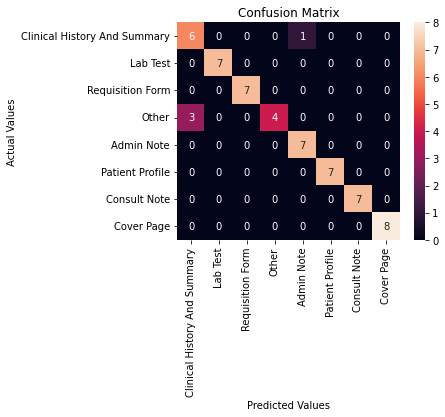

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#classification report
target_names = ['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']
print(classification_report(labels, predictions, target_names=target_names))

                              precision    recall  f1-score   support

Clinical History And Summary       0.67      0.86      0.75         7
                    Lab Test       1.00      1.00      1.00         7
            Requisition Form       1.00      1.00      1.00         7
                       Other       1.00      0.57      0.73         7
                  Admin Note       0.88      1.00      0.93         7
             Patient Profile       1.00      1.00      1.00         7
                Consult Note       1.00      1.00      1.00         7
                  Cover Page       1.00      1.00      1.00         8

                    accuracy                           0.93        57
                   macro avg       0.94      0.93      0.93        57
                weighted avg       0.94      0.93      0.93        57



In [ ]:
from sklearn import metrics
print(f"Accuracy Score: {(metrics.accuracy_score(labels, predictions)) * 100} %" )

Accuracy Score: 92.98245614035088 %


In [ ]:
#File exttraction
#import os, zipfile

#dir_name = '/content/sample_data/'
#extension = ".zip"

#os.chdir(dir_name) # change directory from working dir to dir with files

#for item in os.listdir(dir_name): # loop through items in dir
#    if item.endswith(extension): # check for ".zip" extension
#        file_name = os.path.abspath(item) # get full path of files
#        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
#        zip_ref.extractall(dir_name) # extract file to dir
#        zip_ref.close() # close file
#        os.remove(file_name) # delete zipped file

In [ ]:
########################################################## Testing model with new Test Dataset ############################################################

#checking test data out of current dataset
#making labels and images path
path_t='/content/drive/MyDrive/Kaggle/Pathema_test/' #adding the path of new test folder
labels_t=[]
images_t=[]

for folder in os.listdir(path_t):
  folder_path=path_t + folder
  for img in os.listdir(folder_path):
    img_path=folder_path + '/'+ img
    labels_t.append(folder)
    images_t.append(img_path)

In [ ]:
#code for checking the length of different classes
#class_len={}
#for folder in os.listdir(path_t):
#  class_len[str(folder)]=len(folder)

#print(class_len)

In [ ]:
print(len(images_t))
print(len(labels_t))

167
167


In [ ]:
#converting in dataframe

import pandas as pd
#converting list into dataframe
df_t = pd.DataFrame.from_dict({'image_path': images_t, 'label': labels_t})
df_t.head()


,image_path,label
0,/content/drive/MyDrive/Kaggle/Pathema_test/Req...,Requisition Form
1,/content/drive/MyDrive/Kaggle/Pathema_test/Req...,Requisition Form
2,/content/drive/MyDrive/Kaggle/Pathema_test/Req...,Requisition Form
3,/content/drive/MyDrive/Kaggle/Pathema_test/Cli...,Clinical History And Summary
4,/content/drive/MyDrive/Kaggle/Pathema_test/Cli...,Clinical History And Summary


In [ ]:
len(df_t)

167

In [ ]:
#printing an image
from google.colab.patches import cv2_imshow
import cv2 as cv
img_t=cv.imread(images_t[0])
grayscale = cv.cvtColor(img_t, cv.COLOR_BGR2GRAY)
#cv2_imshow(grayscale)#can't print image due to copyrights

In [ ]:
#from PIL import Image, ImageDraw, ImageFont

#image_t = Image.open(images_t[4])
#image_t = image_t.convert("RGB")
#to show the image
#image

In [ ]:
data_t = Dataset.from_pandas(df_t)
updated_t_dataset = data_t.map(apply_ocr)
updated_t_dataset

  0%|          | 0/167 [00:00<?, ?ex/s]

Dataset({
    features: ['image_path', 'label', 'words', 'bbox'],
    num_rows: 167
})

In [ ]:
#updated_t_dataset=updated_t_dataset.remove_columns("__index_level_0__")
#updated_t_dataset

In [ ]:
encoded_t_dataset = updated_t_dataset.map(lambda example: encode_sample(example), 
                                      features=features)
encoded_t_dataset

  0%|          | 0/167 [00:00<?, ?ex/s]

Dataset({
    features: ['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label', 'image_path', 'words'],
    num_rows: 167
})

In [ ]:
#layoutLm implimentation in transformer library is in Pytorch. So, we are going  to convert every thing in Pytorch format
encoded_t_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])
encoded_t_dataset

Dataset({
    features: ['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label', 'image_path', 'words'],
    num_rows: 167
})

In [ ]:
from torch.utils.data import DataLoader

t_dataloader = DataLoader(encoded_t_dataset, batch_size=1, shuffle=True)

batch_t = next(iter(t_dataloader))
batch_t

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
batch_t["input_ids"][0]

tensor([  101,  6904,  2595,  8241, 17153, 17153, 21621,  3078,  1998, 12233,
         2729,  8698,  2692,  8840, 22930,  2050,  1038,  2140, 16872, 26261,
         3998,  1010, 23290,  8889, 17153, 21621,  6187,  3938, 12376,  2629,
         1011,  2753, 22025,  1023,  1013,  2459,  1013, 25682,  1017,  1024,
         2410,  1024,  4601,  7610,  3931,  1017,  1013,  4002,  2581,  6904,
         2595,  8241, 28506,  1010, 12289,  2720,  2078,  1024, 17332, 20958,
        23833,  1010,  2079,  2497,  1024,  1015,  1013,  2538,  1013,  3705,
         1010,  3348,  1024,  1049,  3942,  3058,  1024,  1018,  1013,  2260,
         1013, 25682,  2852,  1012, 25022,  2532, 21871, 20147, 27875,  1006,
         1001, 17196,  1011, 19015,  1011, 23628,  2475,  1007,  2155,  2381,
         1024,  8182,  1010, 15704,  2013,  3188,  2591,  2381,  1024,  8182,
         1010, 15704,  2013,  3188, 19960,  1012, 16216, 24582,  2050, 14841,
         5644,  1024,  1009,  2004,  8197,  6657,  2659, 13004, 

In [ ]:
#checking input_ids that whether they are correct by decoding them
#tokenizer.decode(batch_t['input_ids'][0].tolist())#not printing data due to copyrights

In [ ]:
#Checking on new test dataset
model.eval()
labels_output=[]
predictions_output=[]

###
y_pred_t=[]
y_label_t=[]
correct = 0
for batch in t_dataloader:
    
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)
  
    with torch.no_grad():
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)


    predictions = outputs.logits.argmax(-1)
    ###
    y_pred_t.append(predictions)
    ###
    y_label_t.append(labels)
    #print(labels)
    #print(predictions)
    correct += (predictions == labels).float().sum()
    #print(correct)

accuracy = 100 * correct / len(df_t)
print("Testing accuracy:", accuracy.item())

Testing accuracy: 64.67066192626953


In [ ]:
print(y_pred_t)
print(y_label_t)

[tensor([0], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([6], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([3], device='cuda:0'), tensor([3], device='cuda:0'), tensor([3], device='cuda:0'), tensor([1], device='cuda:0'), tensor([0], device='cuda:0'), tensor([3], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([2], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([2], device='cuda:0'), tensor([0], device='cuda:0'), tensor([3], device='cuda:0'), tensor([2], device='cuda:0'), tensor([2], device='cuda:0'), tensor([0], device='cuda:0'), tensor([2], device='cuda:0'), tensor([5], device='cuda:0'), tensor([3], device='cuda:0'), tensor([3], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0], device='cuda:0'), tensor([0

In [ ]:
#extracting the labels from tensors aa making a list
label5=[]
label6=[]
labels_t=[] #extracted label

for val0 in y_label_t:
  #converted to numpy array
  label5.append(val0.cpu().numpy())
for val2 in label5:
  label6.append(val2.tolist())#converting from array to list of list of labels
for val3 in label6:#converting in list of labels
  for val4 in val3:
    labels_t.append(val4)



#extracting the predictions from tensors and making a list
pred5=[]
pred6=[]
predictions_t=[] #extracted label

for val0 in y_pred_t:
  #converted to numpy array
  pred5.append(val0.cpu().numpy())
for val2 in pred5:
  pred6.append(val2.tolist())#converting from array to list of list of labels
for val3 in pred6:#converting in list of labels
  for val4 in val3:
    predictions_t.append(val4)



print(labels_t[0:5])
print(predictions_t[0:5])

[3, 3, 3, 6, 0]
[0, 3, 0, 6, 3]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix
cm_t = confusion_matrix(labels_t, predictions_t)
cm_t

array([[23,  0,  0, 13,  0,  1,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0],
       [41,  0,  0, 31,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  2,  0,  1,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3]])

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_t = pd.DataFrame(cm_t,
                     index = [['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']], 
                     columns = [['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']])
cm_df_t

,Clinical History And Summary,Lab Test,Requisition Form,Other,Admin Note,Patient Profile,Consult Note,Cover Page
Clinical History And Summary,23,0,0,13,0,1,0,0
Lab Test,0,3,0,0,0,0,0,0
Requisition Form,0,0,26,0,0,0,0,0
Other,41,0,0,31,1,0,0,0
Admin Note,0,0,0,0,3,0,0,0
Patient Profile,0,0,0,0,0,4,0,0
Consult Note,0,0,2,0,1,0,15,0
Cover Page,0,0,0,0,0,0,0,3


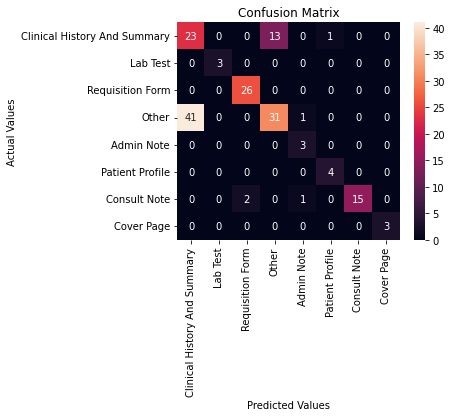

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_t, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#classification report
target_names = ['Clinical History And Summary','Lab Test','Requisition Form','Other','Admin Note','Patient Profile','Consult Note','Cover Page']
print(classification_report(labels_t, predictions_t, target_names=target_names))

                              precision    recall  f1-score   support

Clinical History And Summary       0.36      0.62      0.46        37
                    Lab Test       1.00      1.00      1.00         3
            Requisition Form       0.93      1.00      0.96        26
                       Other       0.70      0.42      0.53        73
                  Admin Note       0.60      1.00      0.75         3
             Patient Profile       0.80      1.00      0.89         4
                Consult Note       1.00      0.83      0.91        18
                  Cover Page       1.00      1.00      1.00         3

                    accuracy                           0.65       167
                   macro avg       0.80      0.86      0.81       167
                weighted avg       0.71      0.65      0.65       167



In [ ]:
from sklearn import metrics
print(f"Accuracy Score: {(metrics.accuracy_score(labels_t, predictions_t)) * 100} %" )

Accuracy Score: 64.67065868263472 %


**Note:** We can see some overfitting as the train data is very less(from single organisation) and we are only checking the performance of our model. In real case we have much bigger dataset almost more than 11,000 samples from different organizations to train our model which gave us much higher accuracy.